# Challenge - Scraper Chuck Norris sur plusieurs pages

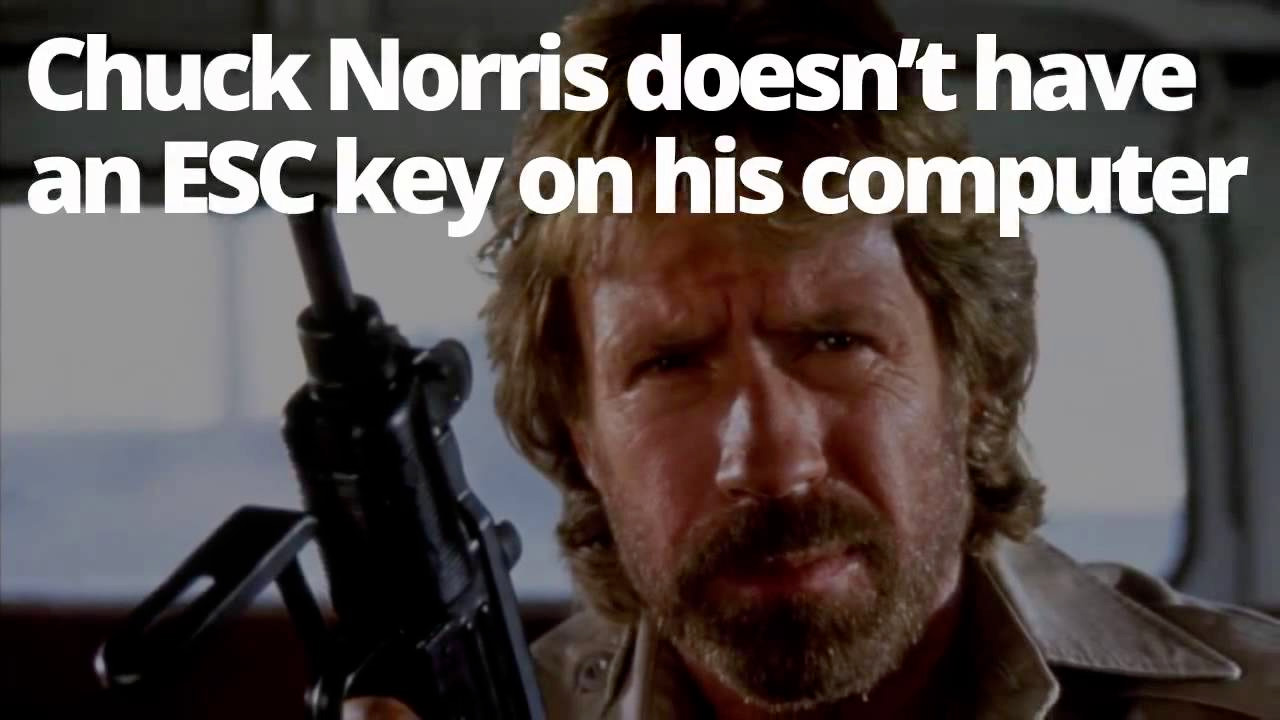

1. Observe attentivement l'URL de la page 1. Essaye de passer à la page 2. Dans un notebook python, essaye de générer automatiquement les URL des 5 premières pages (avec une boucle par exemple ?)
2. Utilise BeautifulSoup pour scraper les facts et les notes des 5 premières pages, grâce aux URL que tu as générées. (Nous pourrions faire les 100 ou 200 pages suivantes, mais ca risque d'entrainer une charge inutile pour ceux qui administrent ce serveur.) Le résultat doit être dans un dictionnaire.
3. Crée un DataFrame contenant ces données, il doit donc posséder 2 colonnes et 100 lignes.
4. Crée une visualisation de la distribution des notes.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# récupérer les infos des urls des 5 pages + update dict
dic = {}

for pages in range(1, 6):  
    url = "https://chucknorrisfacts.fr/facts/top/"+str(pages)

    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    facts = soup.find_all("p", {"class": "card-text"})
    notation = soup.find_all('span')

    dic_result = {facts[x].text : notation[x].text[1:-4] for x in range(20)}
    dic.update(dic_result)

# check nb results
print(len(dic))

# dic sous data frame
result_df = pd.DataFrame.from_dict(dic, orient=("index")).reset_index().rename(columns={"index":"Joke", 0:"Note"})
result_df["Note"] = result_df["Note"].astype("float")
result_df


100


,Joke,Note
0,Les ennemis des amis de Chuck Norris sont ses ...,8.96
1,Chuck Norris mine de la crypto-monnaie avec la...,8.55
2,,8.47
3,L'avenir se demande parfois ce que Chuck Norri...,8.43
4,"Un jour Chuck Norris a eu un zero en latin, de...",8.43
...,...,...
95,Chuck Norris a eu 20/20 au bac philo 2009 en r...,8.22
96,"Si Chuck Norris n'utilise pas l'Oreal, c'est p...",8.22
97,"Même sans prononcer son nom, on sait de qui je...",8.22
98,Hercule est un demi Dieu et Dieu est un demi C...,8.22


In [3]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Joke    100 non-null    object 
 1   Note    100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


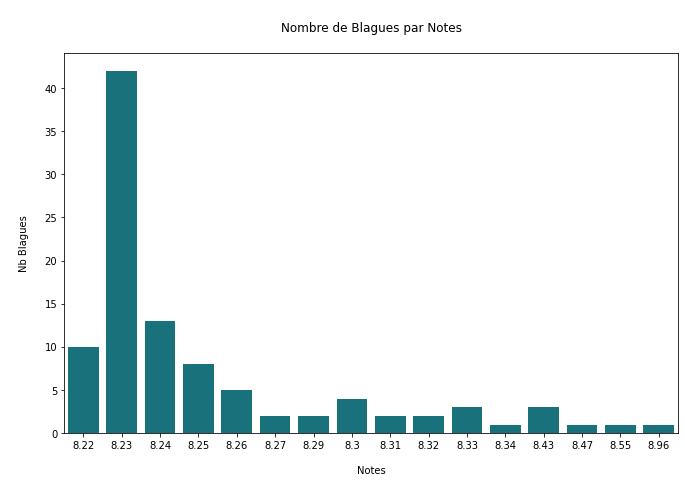

In [4]:
# préparation des données
data_plot = result_df.value_counts(["Note"]).to_frame("Total").reset_index()

# ----------------- Bar Plot  ----------------- #

plt.subplots(figsize=(11,7))

sns.barplot(x="Note", 
            y="Total", 
            data=data_plot,
            color="#087e8b").set(
                title="\nNombre de Blagues par Notes\n", 
                xlabel="\nNotes", 
                ylabel="\nNb Blagues\n"
                )
plt.show()